In [1]:
import pickle
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os


from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

from modules.sequential import *
from modules.linear import *
from modules.loss import *
from modules.activation import *


In [20]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.eye(len(set(y_train)))[y_train]
y_test = np.eye(len(set(y_test)))[y_test]
classes_names_fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
X_train = X_train/255.0
X_test = X_test/255.0
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56000, 784)

(56000, 10)

(14000, 784)

(14000, 10)

# model 2

In [21]:

with open('models/model2.pkl', 'rb') as f:
    optim = pickle.load(f)

def get_embedding(X, optim, encoder_length=2):
    for i in range(2*encoder_length):
        X = optim.model_sequentiel._layers[i].forward(X)
    return X

reconstructed_X_train = get_embedding(X_train, optim, encoder_length=3)
reconstructed_X_test =  get_embedding(X_test, optim, encoder_length=3)
display(reconstructed_X_train.shape, reconstructed_X_test.shape, y_train.shape, y_test.shape)



(56000, 30)

(14000, 30)

(56000, 10)

(14000, 10)

100%|██████████| 100/100 [01:36<00:00,  1.04it/s]


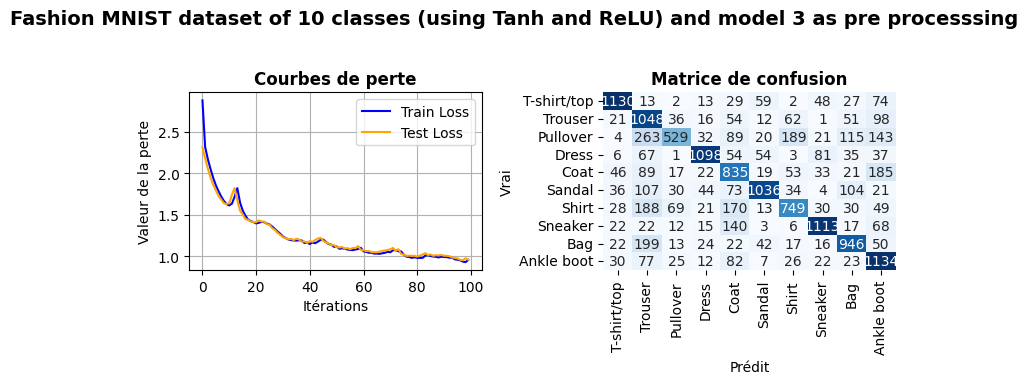


Rapport de classification :

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.82      1397
     Trouser       0.51      0.75      0.60      1399
    Pullover       0.72      0.38      0.49      1405
       Dress       0.85      0.76      0.80      1436
        Coat       0.54      0.63      0.58      1320
      Sandal       0.82      0.70      0.75      1489
       Shirt       0.66      0.56      0.60      1347
     Sneaker       0.81      0.78      0.80      1418
         Bag       0.69      0.70      0.70      1351
  Ankle boot       0.61      0.79      0.69      1438

    accuracy                           0.69     14000
   macro avg       0.70      0.69      0.68     14000
weighted avg       0.71      0.69      0.69     14000



In [12]:
classifier =  Sequential([Linear(reconstructed_X_test.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10)])
multi_class(reconstructed_X_train, y_train,reconstructed_X_test, y_test, classifier, n_iter=100, eps=1e-1, classes_names=classes_names_fashion_mnist, titre='Fashion MNIST dataset of 10 classes (using Tanh and ReLU) and model 3 as pre processsing', model_name='models/pre_trait_multi_classe_fashion_relu.pkl', loss_name='models/pre_trait_multi_classe_fashion_relu_on_model2.csv')


In [22]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('Kuzushiji-MNIST', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train = X_train / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.eye(len(set(y_train)))[y_train]
y_test = np.eye(len(set(y_test)))[y_test]
classes_names_kuzushiji_mnist = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

reconstructed_X_train = get_embedding(X_train, optim, encoder_length=3)
reconstructed_X_test =  get_embedding(X_test, optim, encoder_length=3)


(56000, 784)

(56000, 10)

(14000, 784)

(14000, 10)

100%|██████████| 100/100 [01:38<00:00,  1.01it/s]


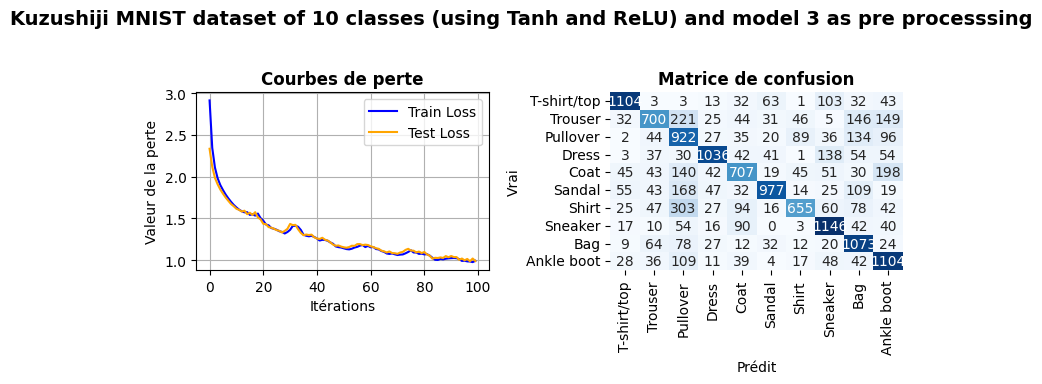


Rapport de classification :

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.79      0.81      1397
     Trouser       0.68      0.50      0.58      1399
    Pullover       0.45      0.66      0.54      1405
       Dress       0.82      0.72      0.77      1436
        Coat       0.63      0.54      0.58      1320
      Sandal       0.81      0.66      0.73      1489
       Shirt       0.74      0.49      0.59      1347
     Sneaker       0.70      0.81      0.75      1418
         Bag       0.62      0.79      0.69      1351
  Ankle boot       0.62      0.77      0.69      1438

    accuracy                           0.67     14000
   macro avg       0.69      0.67      0.67     14000
weighted avg       0.69      0.67      0.67     14000



In [23]:
classifier =  Sequential([Linear(reconstructed_X_test.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10)])
multi_class(reconstructed_X_train, y_train,reconstructed_X_test, y_test, classifier, n_iter=100, eps=1e-1, classes_names=classes_names_fashion_mnist, titre='Kuzushiji MNIST dataset of 10 classes (using Tanh and ReLU) and model 3 as pre processsing', model_name='models/pre_trait_multi_classe_kuzu_relu.pkl', loss_name='models/pre_trait_multi_classe_kuzu_relu_on_model2.csv')


# model 4

In [13]:
with open('models/model4.pkl', 'rb') as f:
    optim = pickle.load(f)
    
reconstructed_X_train = get_embedding(X_train, optim, encoder_length=2)
reconstructed_X_test =  get_embedding(X_test, optim, encoder_length=2)
display(reconstructed_X_train.shape, reconstructed_X_test.shape, y_train.shape, y_test.shape)


(56000, 3)

(14000, 3)

(56000, 10)

(14000, 10)

100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


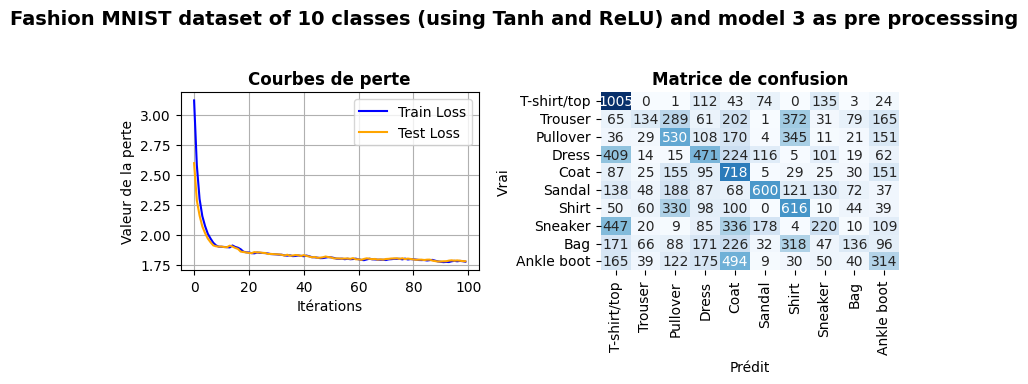


Rapport de classification :

              precision    recall  f1-score   support

 T-shirt/top       0.39      0.72      0.51      1397
     Trouser       0.31      0.10      0.15      1399
    Pullover       0.31      0.38      0.34      1405
       Dress       0.32      0.33      0.32      1436
        Coat       0.28      0.54      0.37      1320
      Sandal       0.59      0.40      0.48      1489
       Shirt       0.33      0.46      0.39      1347
     Sneaker       0.29      0.16      0.20      1418
         Bag       0.30      0.10      0.15      1351
  Ankle boot       0.27      0.22      0.24      1438

    accuracy                           0.34     14000
   macro avg       0.34      0.34      0.31     14000
weighted avg       0.34      0.34      0.32     14000



In [8]:
classifier =  Sequential([Linear(reconstructed_X_test.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10)])
multi_class(reconstructed_X_train, y_train,reconstructed_X_test, y_test, classifier, n_iter=100, eps=1e-1, classes_names=classes_names_fashion_mnist, titre='Fashion MNIST dataset of 10 classes (using Tanh and ReLU) and model 3 as pre processsing', model_name='models/pre_trait_multi_classe_fashion_relu_on_model4.pkl', loss_name='models/pre_trait_multi_classe_fashion_relu_on_model4.csv')


In [14]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('Kuzushiji-MNIST', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train = X_train / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.eye(len(set(y_train)))[y_train]
y_test = np.eye(len(set(y_test)))[y_test]
classes_names_kuzushiji_mnist = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

reconstructed_X_test =  get_embedding(X_test, optim, encoder_length=2)
reconstructed_X_train = get_embedding(X_train, optim, encoder_length=2)


(56000, 784)

(56000, 10)

(14000, 784)

(14000, 10)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:37<00:00,  1.02it/s]


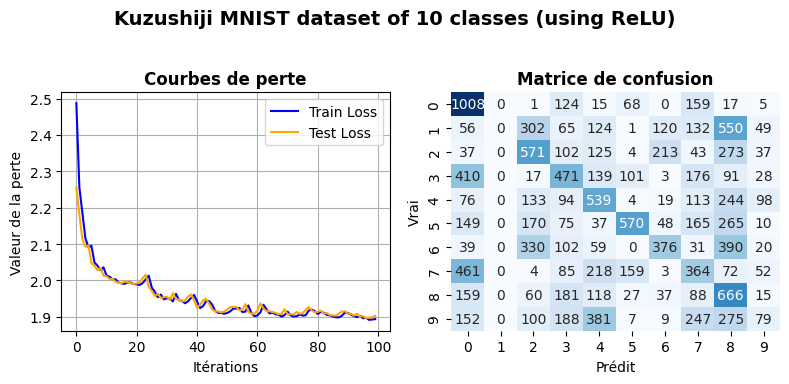


Rapport de classification :

              precision    recall  f1-score   support

           0       0.40      0.72      0.51      1397
           1       0.00      0.00      0.00      1399
           2       0.34      0.41      0.37      1405
           3       0.32      0.33      0.32      1436
           4       0.31      0.41      0.35      1320
           5       0.61      0.38      0.47      1489
           6       0.45      0.28      0.35      1347
           7       0.24      0.26      0.25      1418
           8       0.23      0.49      0.32      1351
           9       0.20      0.05      0.09      1438

    accuracy                           0.33     14000
   macro avg       0.31      0.33      0.30     14000
weighted avg       0.31      0.33      0.30     14000



c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
classifier = Sequential([Linear(reconstructed_X_train.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10), ReLU()])
multi_class(reconstructed_X_train, y_train,reconstructed_X_test, y_test, classifier, n_iter=100, eps=1e-1, classes_names=classes_names_kuzushiji_mnist, titre='Kuzushiji MNIST dataset of 10 classes (using ReLU)', model_name="models/pre_trait_multi_classes_kuzushiji_mnist1_on_model4.pkl", loss_name="models/pre_trait_loss_multi_classes_kuzushiji_mnist1_on_model4.csv")


# model 3

In [16]:
with open('models/model3.pkl', 'rb') as f:
    optim = pickle.load(f)
    
reconstructed_X_train = get_embedding(X_train, optim, encoder_length=3)
reconstructed_X_test =  get_embedding(X_test, optim, encoder_length=3)


100%|██████████| 100/100 [02:28<00:00,  1.48s/it]


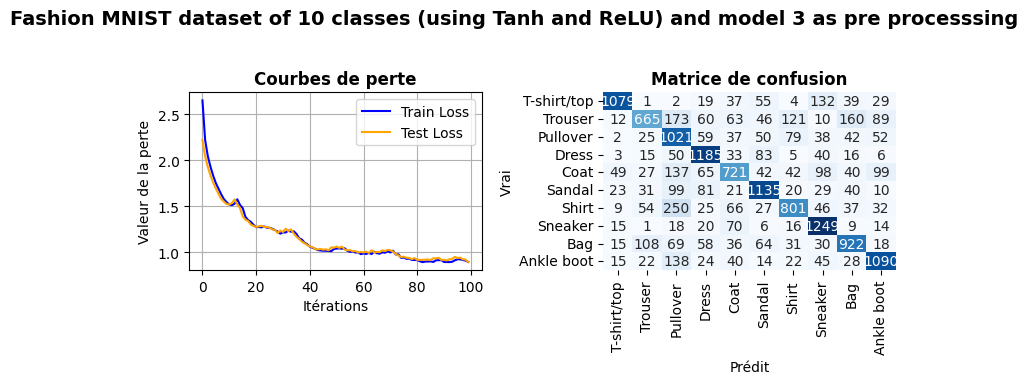


Rapport de classification :

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.77      0.82      1397
     Trouser       0.70      0.48      0.57      1399
    Pullover       0.52      0.73      0.61      1405
       Dress       0.74      0.83      0.78      1436
        Coat       0.64      0.55      0.59      1320
      Sandal       0.75      0.76      0.75      1489
       Shirt       0.70      0.59      0.64      1347
     Sneaker       0.73      0.88      0.80      1418
         Bag       0.69      0.68      0.69      1351
  Ankle boot       0.76      0.76      0.76      1438

    accuracy                           0.70     14000
   macro avg       0.71      0.70      0.70     14000
weighted avg       0.71      0.70      0.70     14000



In [17]:
classifier =  Sequential([Linear(reconstructed_X_train.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10)])
multi_class(reconstructed_X_train, y_train,reconstructed_X_test, y_test, classifier, n_iter=100, eps=1e-1, classes_names=classes_names_fashion_mnist, titre='Fashion MNIST dataset of 10 classes (using Tanh and ReLU) and model 3 as pre processsing', model_name='models/pre_trait_multi_classe_fashion_relu_on_model3.pkl', loss_name='models/pre_trait_multi_classe_fashion_relu_on_model3.csv')


In [18]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('Kuzushiji-MNIST', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X_train = X_train / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.eye(len(set(y_train)))[y_train]
y_test = np.eye(len(set(y_test)))[y_test]
classes_names_kuzushiji_mnist = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

reconstructed_X_test = get_embedding(X_test, optim, encoder_length=3)
reconstructed_X_train = get_embedding(X_train, optim, encoder_length=3)


(56000, 784)

(56000, 10)

(14000, 784)

(14000, 10)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [06:18<00:00,  3.79s/it]


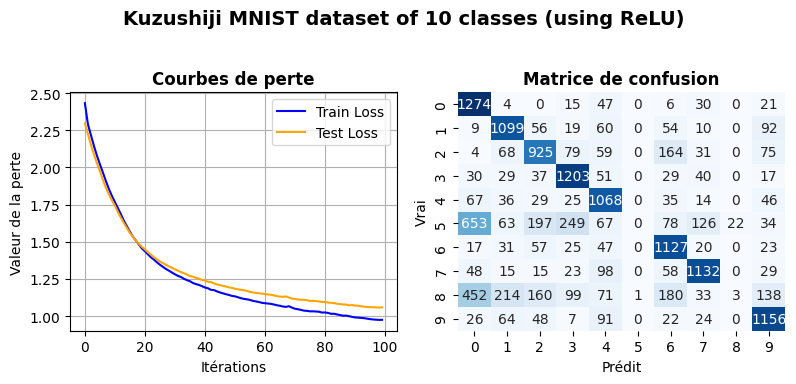


Rapport de classification :

              precision    recall  f1-score   support

           0       0.49      0.91      0.64      1397
           1       0.68      0.79      0.73      1399
           2       0.61      0.66      0.63      1405
           3       0.69      0.84      0.76      1436
           4       0.64      0.81      0.72      1320
           5       0.00      0.00      0.00      1489
           6       0.64      0.84      0.73      1347
           7       0.78      0.80      0.79      1418
           8       0.12      0.00      0.00      1351
           9       0.71      0.80      0.75      1438

    accuracy                           0.64     14000
   macro avg       0.54      0.64      0.57     14000
weighted avg       0.53      0.64      0.57     14000



In [19]:
classifier = Sequential([Linear(X_train.shape[1], 176),TanH(),Linear(176, 42), ReLU(), Linear(42, 10), ReLU()])
multi_class(X_train, y_train,X_test, y_test, classifier, n_iter=100, eps=1e-1, classes_names=classes_names_kuzushiji_mnist, titre='Kuzushiji MNIST dataset of 10 classes (using ReLU)', model_name="models/pre_trait_multi_classes_kuzushiji_mnist1_on_model3.pkl", loss_name="models/pre_trait_loss_multi_classes_kuzushiji_mnist1_on_model3.csv")
